#### 1) and

[[0 0]
 [1 0]
 [0 1]
 [1 1]] 의 예측 결과:  [0 0 0 1]
정답률 =  1.0


c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


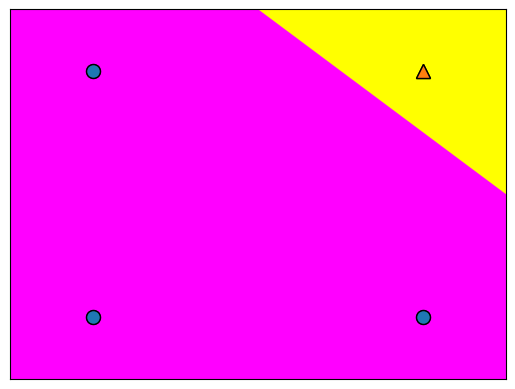

In [5]:
import numpy as np

import mglearn

# and 학습용 데이터와 답

learn_data = np.array([[0,0], [1,0], [0,1], [1,1]])

learn_label = np.array([0, 0, 0, 1]) #답

mglearn.discrete_scatter(learn_data[:,0], learn_data[:,1], learn_label)

#######################################################

from sklearn.svm import LinearSVC  

from sklearn.metrics import accuracy_score

svm = LinearSVC()

svm.fit(learn_data, learn_label)

# 모형의 예측값

X_test = np.array([[0,0], [1,0], [0,1], [1,1]])

pred = svm.predict(X_test)

# 모형 평가

print(X_test , "의 예측 결과: " ,  pred)

print("정답률 = " , accuracy_score([0, 0, 0, 1], pred))

#######################################################

mglearn.discrete_scatter(learn_data[:,0],learn_data[:,1],learn_label)  

mglearn.plots.plot_2d_classification(svm, learn_data, cm='spring')

In [ ]:
#!C:\Users\tjoeun\AppData\Local\Programs\Python\Python39\Scripts\pip install mglearn

#### 2) xor(svm)

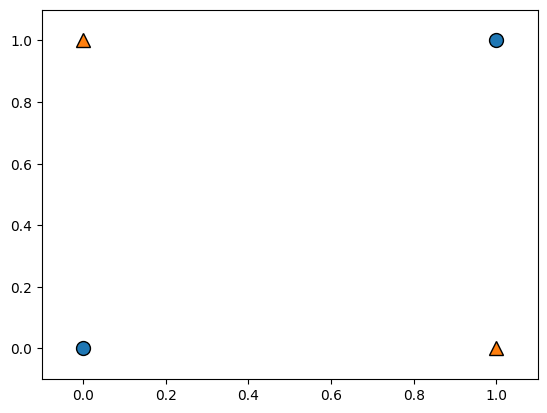

In [12]:
import numpy as np  

import mglearn



X_train = np.array([[0,0], [1,0], [0,1], [1,1]])

# X xor Y

y_train = [0, 1, 1, 0]  

mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)

#######################################################


[[0 0]
 [1 0]
 [0 1]
 [1 1]] 의 예측 결과:  [0 1 1 0]
정답률 =  1.0


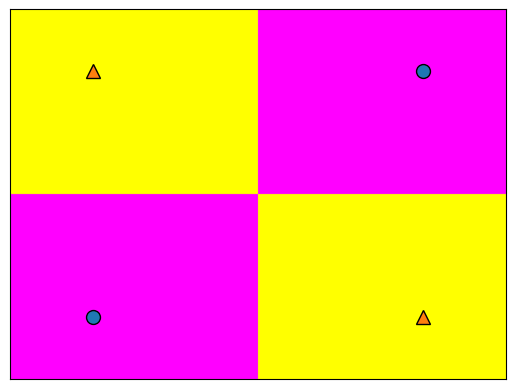

In [13]:

from sklearn.svm import SVC  

from sklearn.metrics import accuracy_score

#svm = SVC(kernel='linear')

svm = SVC(kernel='rbf')

svm.fit(X_train, y_train)

# 예측

X_test = np.array([[0,0], [1,0], [0,1], [1,1]])

pred = svm.predict(X_test)

# 평가

print(X_test , "의 예측 결과: " ,  pred)

print("정답률 = " , accuracy_score([0, 1, 1, 0], pred))  

#######################################################

mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)  

mglearn.plots.plot_2d_classification(svm, X_train, cm='spring')

#### 3) linear SVM

In [14]:
import numpy as np

X = np.array([[1, 2], [1.5, 3], [3.5, 4], [4, 5], [6, 2], [7, 5], [9, 4], [8, 2]])

y = [0, 0, 0, 0, 1, 1, 1, 1]

#######################################################

from sklearn.svm import SVC

#선형 svm 모형

model = SVC(kernel = 'linear')

model.fit(X, y)



SVC(kernel='linear')

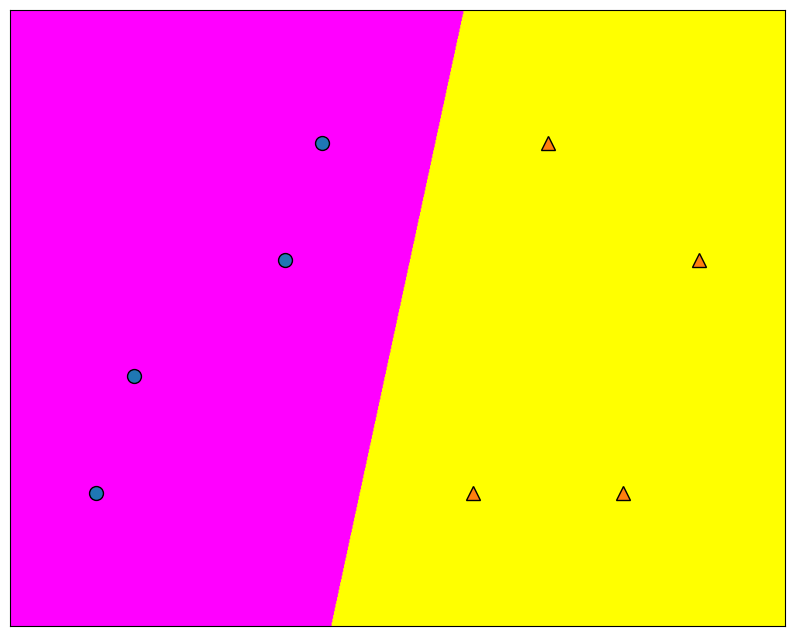

In [15]:
#######################################################

import mglearn

import matplotlib.pyplot as plt

plt.figure(figsize=[10,8])

mglearn.plots.plot_2d_classification(model, X, cm='spring')

mglearn.discrete_scatter(X[:,0], X[:,1], y)





[0]
[[4. 5.]
 [6. 2.]
 [7. 5.]]


array([3, 4, 5])

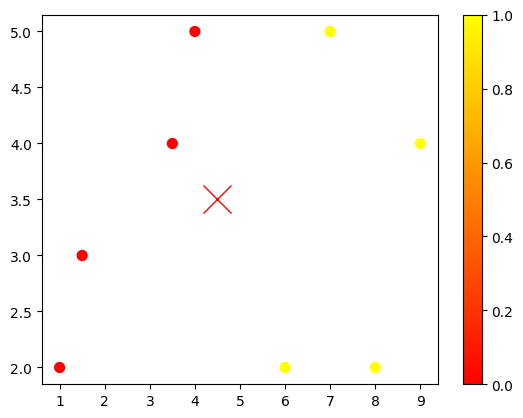

In [16]:
#######################################################

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# X 데이터는 어느 클래스로 분류될까요?

plt.plot([4.5], [3.5], 'x', color='red', markersize=20)

plt.colorbar()

print(model.predict([[4.5, 3.5]]))

#서포트 벡터 샘플

print(model.support_vectors_)

# 서포트 벡터의 인덱스

model.support_

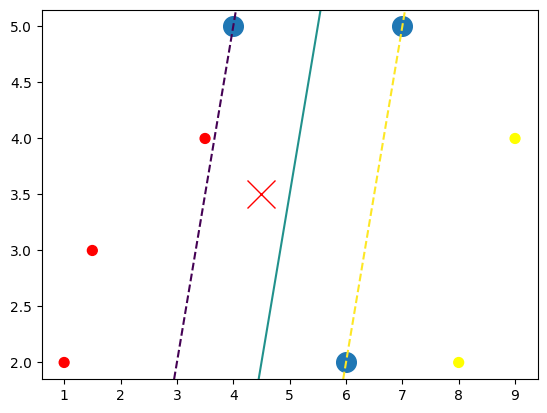

In [17]:
#######################################################

def plot_svc(model,ax=None):

    if ax==None:

        ax = plt.gca()

    xlim = ax.get_xlim()

    ylim = ax.get_ylim()

    

    # 그래프 그리드

    x = np.linspace(xlim[0], xlim[1], 30)

    y = np.linspace(ylim[0], ylim[1], 30)

    Y, X = np.meshgrid(y, x) # 정방행렬로 만들고

    xy = np.vstack([X.ravel(), Y.ravel()]).T #1차원으로 만들고 행렬 전치

    #판별함수에 입력하고

    P = model.decision_function(xy).reshape(X.shape)

    

    # decision boundary와 margins

    # 등고선, 2차원 넘파이 배열

    ax.contour(X, Y, P,

               levels=[-1, 0, 1],

               linestyles=['--', '-', '--'])

    

    # 서포트 벡터 출력

    ax.scatter(model.support_vectors_[:, 0],

                   model.support_vectors_[:, 1],

                   s=200)

    ax.set_xlim(xlim)

    ax.set_ylim(ylim)

#######################################################

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.plot([4.5], [3.5], 'x', color='red', markersize=20)

plot_svc(model)

#### 4) 무작위 데이터(blobs)

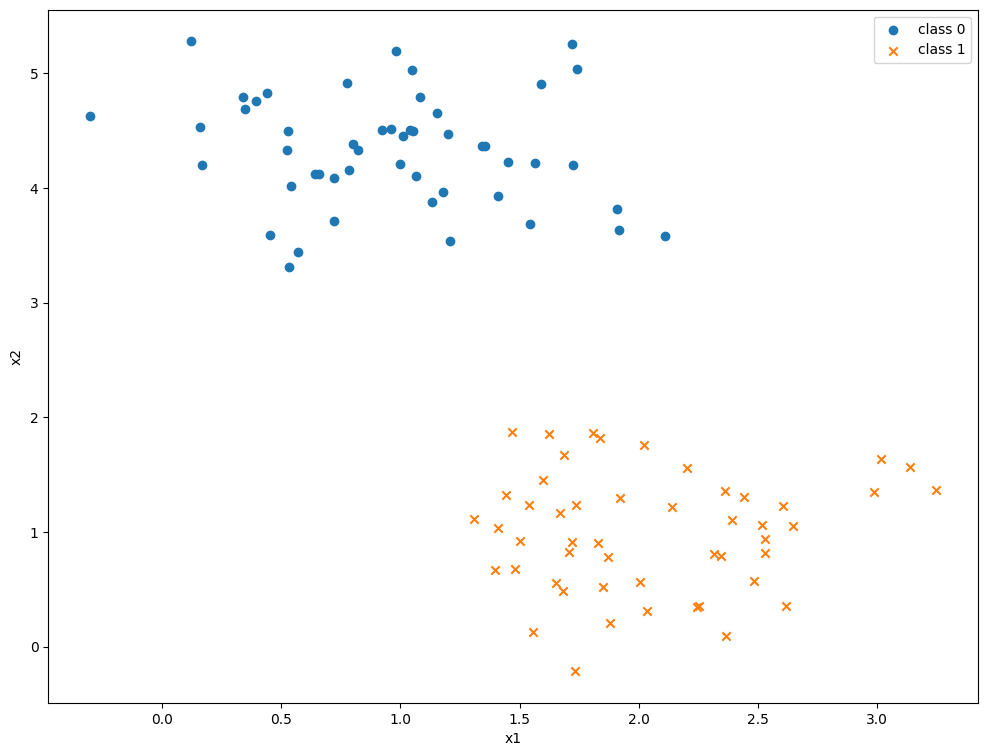

In [18]:
from sklearn.datasets import make_blobs

# centers=2 (2 class), cluster_std 클러스터의 표준편차

X, y = make_blobs(n_samples=100, centers=2, cluster_std=0.5, random_state=0)

#######################################################

import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))

plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o', label="class 0")

plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x', label="class 1")

plt.xlabel("x1")

plt.ylabel("x2")

plt.legend()

plt.show()





In [27]:
#######################################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.2, stratify=y,random_state=10)


#######################################################

from sklearn.svm import SVC

#model = SVC(kernel='linear').fit(X_train, y_train)
model = SVC(kernel='rbf').fit(X_train, y_train)

#######################################################

# 클래스별 서포트 벡터의 개수(0 2개, 1 1개)

model.n_support_

#######################################################

# 서포트 벡터의 인덱스

model.support_

#######################################################

# 서포트 벡터의 값

model.support_vectors_

#######################################################

array([[ 0.12313498,  5.27917503],
       [ 1.72039618,  5.25173192],
       [ 0.5323772 ,  3.31338909],
       [ 2.11114739,  3.57660449],
       [ 1.46870582,  1.86947425],
       [ 1.73345832, -0.21403792],
       [ 3.1368855 ,  1.56592763],
       [ 1.62465468,  1.85269614]])

array([1])

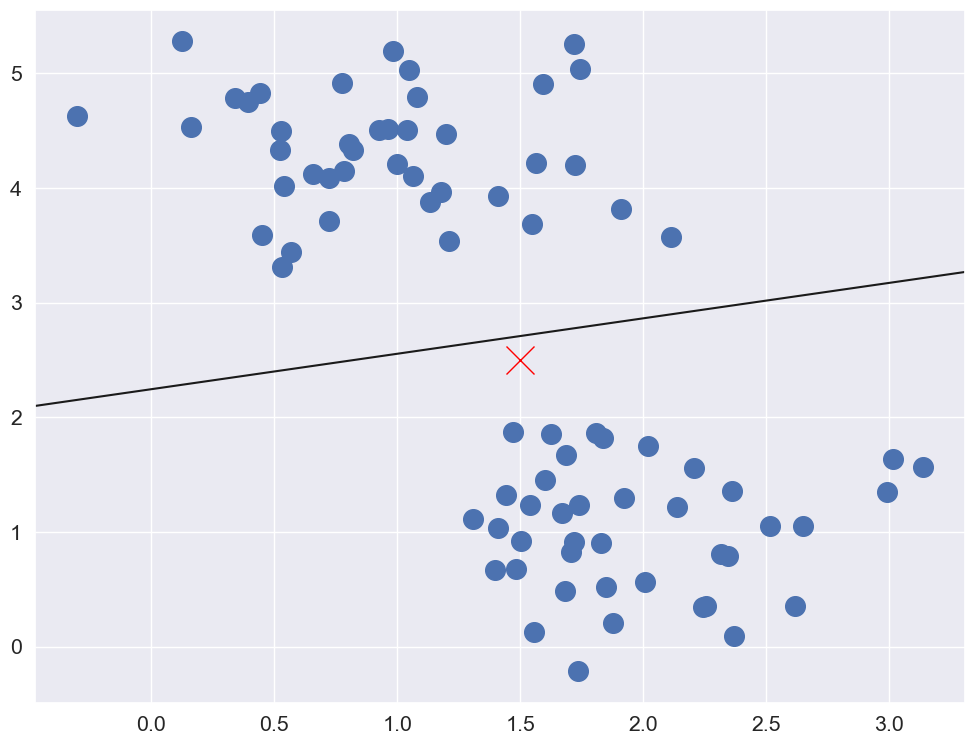

In [29]:
import numpy as np

def plot_svc(model,ax=None):

    if ax==None:

        ax = plt.gca()

    xlim = ax.get_xlim()

    ylim = ax.get_ylim()

    

    # 그래프 그리드

    x = np.linspace(xlim[0], xlim[1], 30)

    y = np.linspace(ylim[0], ylim[1], 30)

    Y, X = np.meshgrid(y, x) # 정방행렬로 만들고

    xy = np.vstack([X.ravel(), Y.ravel()]).T #1차원으로 만들고 행렬 전치

    #판별함수에 입력하고

    P = model.decision_function(xy).reshape(X.shape)

    

    # decision boundary와 margins

    # 등고선, 2차원 넘파이 배열

    ax.contour(X, Y, P,

               levels=[-1, 0, 1], colors='k',

               linestyles=['--', '-', '--'])

    

    # 서포트 벡터 그리기

    ax.scatter(model.support_vectors_[:, 0],

                   model.support_vectors_[:, 1],

                   s=200)

    ax.set_xlim(xlim)

    ax.set_ylim(ylim)

#######################################################

plt.figure(figsize=(12,9))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='winter')

# X_new 데이터는 어느 클래스로 분류될까요?

X_new = [1.5, 2.5]

plt.plot(X_new[0], X_new[1], 'x', color='red', markersize=20)

plot_svc(model)

#######################################################

model.predict([[1.5, 2.5]])







In [30]:
#######################################################

from sklearn.model_selection import GridSearchCV

params = {'C': [0.1, 1, 10, 100], 'gamma': [0.00001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVC(), params)

grid.fit(X_train, y_train)

print("Best Parameters:\n", grid.best_params_)

print("Best Estimator:\n", grid.best_estimator_)

#######################################################

model = grid.best_estimator_

model

Best Parameters:
 {'C': 0.1, 'gamma': 1e-05}
Best Estimator:
 SVC(C=0.1, gamma=1e-05)


SVC(C=0.1, gamma=1e-05)

In [31]:
#######################################################

print("학습용:",model.score(X_train, y_train))

print("검증용:",model.score(X_test, y_test))

학습용: 1.0
검증용: 1.0


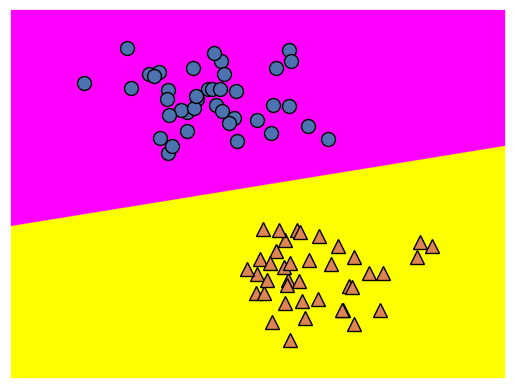

In [32]:
#######################################################

import mglearn  

mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)  

mglearn.plots.plot_2d_classification(model, X_train, cm='spring')

#### 5) 올리베티 얼굴 데이터셋

In [26]:
# The Olivetti faces dataset

# 올리베티 얼굴 데이터셋

# 1992~1994 AT&T와 캠브리지 대학 전산 연구실에서 공동으로 제작한 얼굴 사진 데이터베이스

# 40명의 흑백 얼굴 사진 400장, 4096 (64x64) 특성

# 0.0~1.0 (0~255 를 스케일링)

#######################################################

from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

#40명 400장의 흑백이미지

print(len(faces.data))

print(set(faces.target))

#######################################################

print(faces.data.shape) # 이미지 400장, 64x64(4096픽셀)

#######################################################

print(faces.data[0])

400
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}
(400, 4096)
[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]


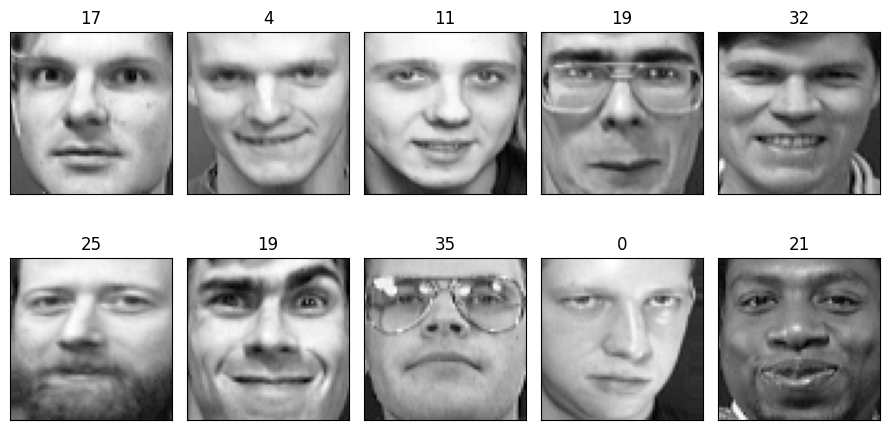

In [22]:
#######################################################

import matplotlib.pyplot as plt

import numpy as np

N = 2 #2행

M = 5 #5열

np.random.seed(0)

fig = plt.figure(figsize=(9, 5))

#컬러맵: https://matplotlib.org/tutorials/colors/colormaps.html

klist = np.random.choice(range(len(faces.data)), N * M)

for i in range(N):

    for j in range(M):

        k = klist[i * M + j]

        ax = fig.add_subplot(N, M, i * M + j + 1)

        ax.imshow(faces.images[k], cmap=plt.cm.gray)

        ax.xaxis.set_ticks([]) #x축 눈금 제거

        ax.yaxis.set_ticks([]) #y축 눈금 제거

        plt.title(faces.target[k])

plt.tight_layout() #여백 조절

plt.show()

In [23]:
#######################################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, stratify=faces.target, test_size=0.2, random_state=0)

#######################################################

from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)

#######################################################

import sys

print(sys.getsizeof(X_train)/(1024*1024)) # 메모리 용량 계산 5MB

5.0001220703125


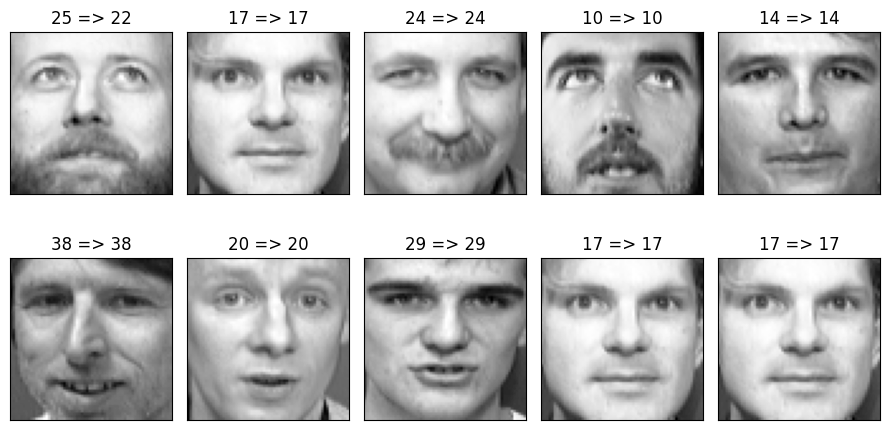

학습용: 1.0
검증용: 0.95


In [24]:
#######################################################

N = 2

M = 5

np.random.seed(4)

fig = plt.figure(figsize=(9, 5))

klist = np.random.choice(range(len(y_test)), N * M)

for i in range(N):

    for j in range(M):

        k = klist[i * M + j]

        ax = fig.add_subplot(N, M, i * M + j + 1)

        ax.imshow(X_test[k:(k + 1), :].reshape(64, 64), cmap=plt.cm.gray)

        ax.xaxis.set_ticks([])

        ax.yaxis.set_ticks([])

        pred=svc.predict(X_test[k:(k + 1), :])[0]

        plt.title(f"{y_test[k]} => {pred}")

        

plt.tight_layout()

plt.show()

#######################################################

print("학습용:",svc.score(X_train, y_train))

print("검증용:",svc.score(X_test, y_test))


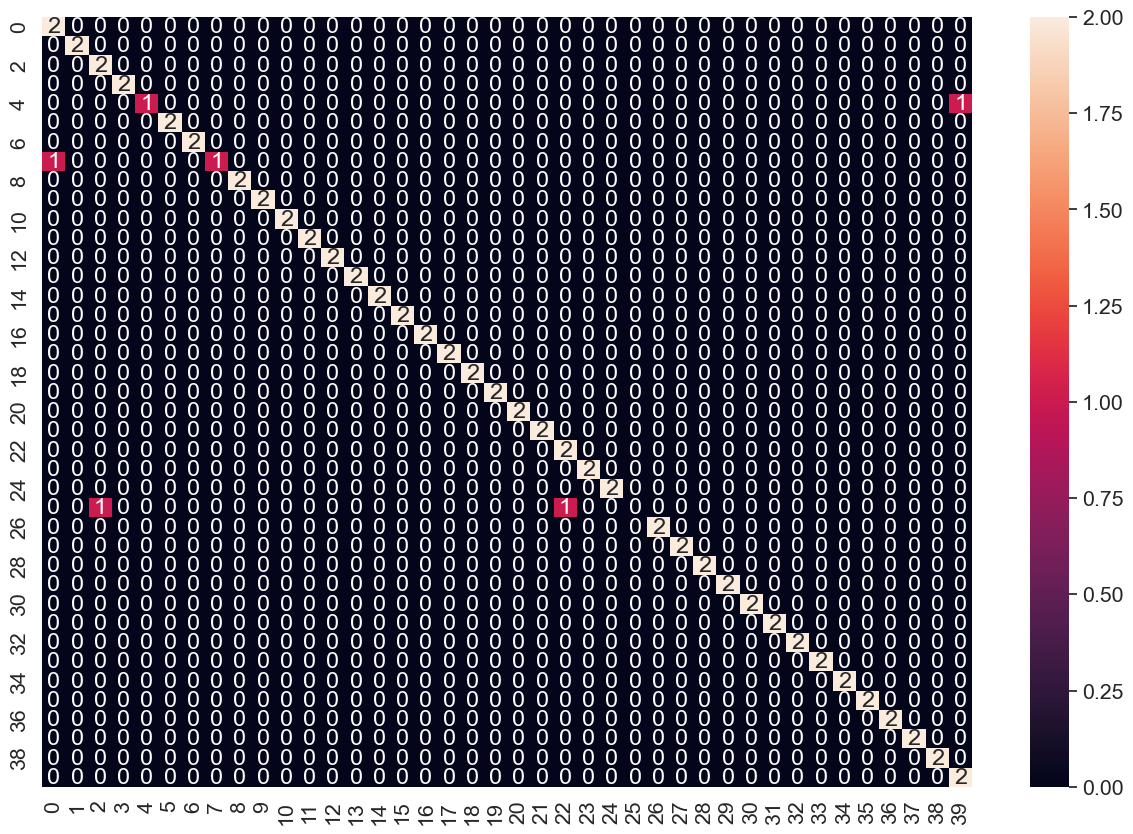

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [25]:
#######################################################

from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns

import pandas as pd

pred = svc.predict(X_test)

cm=confusion_matrix(y_test, pred) # 정오분류표

# 데이터프레임으로 변환

df_cm=pd.DataFrame(cm, index=range(0,40),columns=range(0,40))

sns.set(font_scale=1.4)

plt.figure(figsize=(15,10))

sns.heatmap(df_cm, annot=True) #히트맵 출력

plt.show()

#######################################################

print(classification_report(y_test, pred))

# class 4,7은 정확도가 낮음(f1-score 기준)

In [ ]:
#######################################################

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

pca=PCA(n_components=2, random_state=10)

components=pca.fit_transform(faces.data)

df=pd.DataFrame(data=components, columns=['component 1','component 2'])

df.index=faces.target

#plt.figure(figsize=(20,15))

for i in range(3):

    plt.scatter(df.iloc[faces.target == i, 0], df.iloc[faces.target == i, 1],  label=f'face {i}')

    plt.legend()

plt.show()

#### 6) cost와 gamma

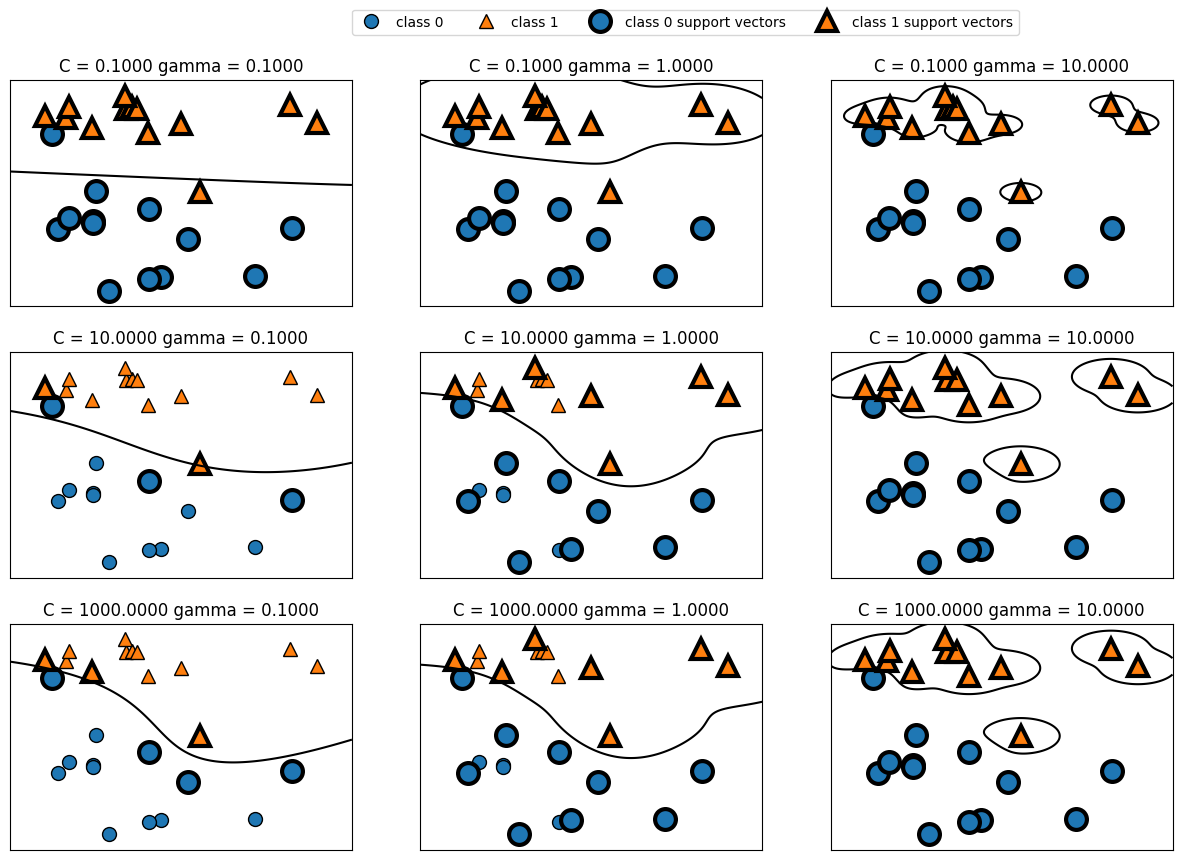

In [11]:
#C(cost) : 정규화 매개변수, 오차에 대한 패널티, C가 작으면 패널티가 커지고 C가 커지면 패널티가 줄어드는 방식, C값을 증가시키면 모델이 좀더 복잡해짐(좀더 자세하게 결정경계를 찾아내는 방식), C값이 작으면 이상치들이 있을 가능성을 크게 잡아서 일반적인 결정 경계를 만들어낸다.
#
#gamma값을 증가시키면 각각의 데이터 포인트가 영향력을 행사하는 거리가 짧아지고 gamma값이 작으면 영향력을 행사하는 거리가 길어진다.
#
#cost와 gamma가 너무 크면 과대적합의 위험이 있고 너무 작으면 과소적합의 위험이 있음

#######################################################

import matplotlib.pyplot as plt

import mglearn

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# cost : 0.1, 10, 1000

# gamma : 0.1, 1, 10

for ax, C in zip(axes, [-1, 1, 3]):

    for a, gamma in zip(ax, [-1, 0, 1]):        

        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

#ncol=4 4개의 셀을 합쳐서 범례 표시

axes[0, 0].legend(["class 0", "class 1", "class 0 support vectors", "class 1 support vectors"], ncol=4, loc=(1, 1.2))

### 7) 서포트 벡터와 Cost,gamma


(-1.0, 3.5)

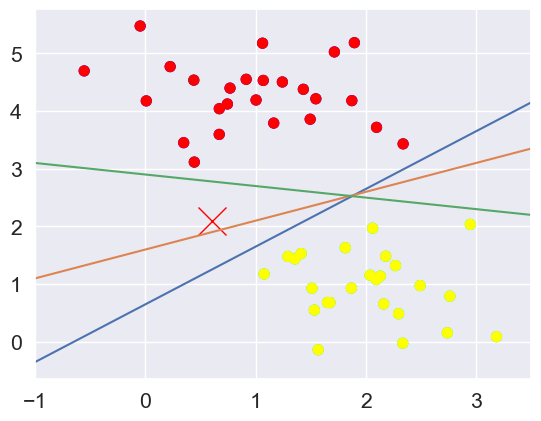

In [33]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

#랜덤 데이터셋, n_samples 샘플개수, centers 중심좌표, cluster_std 클러스터의 표준편차

X, y = make_blobs(n_samples=50, centers=2,

                  random_state=0, cluster_std=0.6)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

#######################################################

import numpy as np

xfit = np.linspace(-1, 3.5, 10) # -1 ~ 3.5 10등분

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# X 데이터는 어느 클래스로 분류될까요?

plt.plot([0.6], [2.1], 'x', color='red',

         markersize=20)

#기울기와 절편에 따라 구분선이 달라짐

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:

    plt.plot(xfit, m * xfit + b)

plt.xlim(-1, 3.5)








[[10 30]
 [20 30]
 [10 40]
 [20 40]]


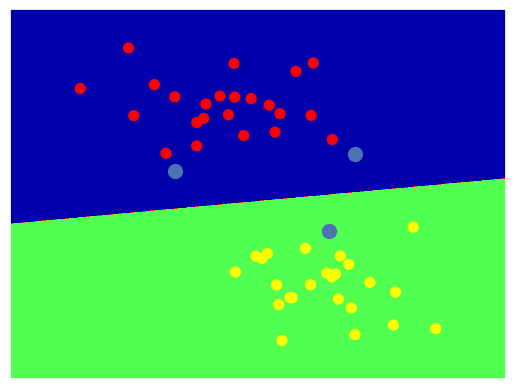

In [34]:
#######################################################

from sklearn.svm import SVC

#선형분류 linear, 비선형분류 rbf(기본값)

model = SVC(kernel='linear')

#model = SVC()

model.fit(X, y)

#######################################################

#서포트 벡터의 좌표값

model.support_vectors_

#######################################################

import mglearn

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100)

mglearn.plots.plot_2d_classification(model, X)

#######################################################

a,b = np.meshgrid([10,20],[30,40])

#print(a)

#print(a.ravel()) # 행렬을 1차원 배열로 만드는 함수

#print(a.ravel().T) # 행렬전치, Transposition Arrays and Swapping Axes

c = np.vstack([a.ravel(), b.ravel()]).T

#c = np.vstack([a.ravel(), b.ravel()])

print(c)


In [35]:
#######################################################

#reshape 연습

a=np.array([[10,20,30],[40,50,60]])

print(a.shape)

b=a.reshape(3,2)

print(a)

print(b)

print(b.shape)

(2, 3)
[[10 20 30]
 [40 50 60]]
[[10 20]
 [30 40]
 [50 60]]
(3, 2)


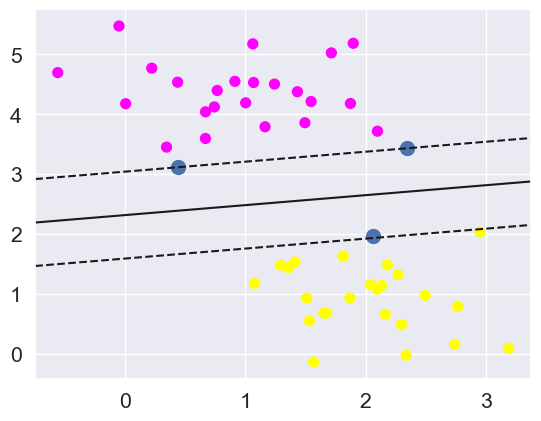

In [36]:
#######################################################

def plot_svc(model,ax=None):

    if ax==None:

        ax = plt.gca()

    xlim = ax.get_xlim()

    ylim = ax.get_ylim()

    

    # 그래프 그리드

    x = np.linspace(xlim[0], xlim[1], 30)

    y = np.linspace(ylim[0], ylim[1], 30)

    Y, X = np.meshgrid(y, x) # 정방행렬로 만들고

    xy = np.vstack([X.ravel(), Y.ravel()]).T #1차원으로 만들고 행렬 전치

    #판별함수에 입력하고

    P = model.decision_function(xy).reshape(X.shape)

    

    # decision boundary와 margins

    # 등고선, 2차원 넘파이 배열

    ax.contour(X, Y, P,

               levels=[-1, 0, 1], colors='k',

               linestyles=['--', '-', '--'])

    

    # 서포트 벡터 그리기

    ax.scatter(model.support_vectors_[:, 0],

                   model.support_vectors_[:, 1],

                   s=100)

    ax.set_xlim(xlim)

    ax.set_ylim(ylim)

#서포트 벡터 표시

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

plot_svc(model)



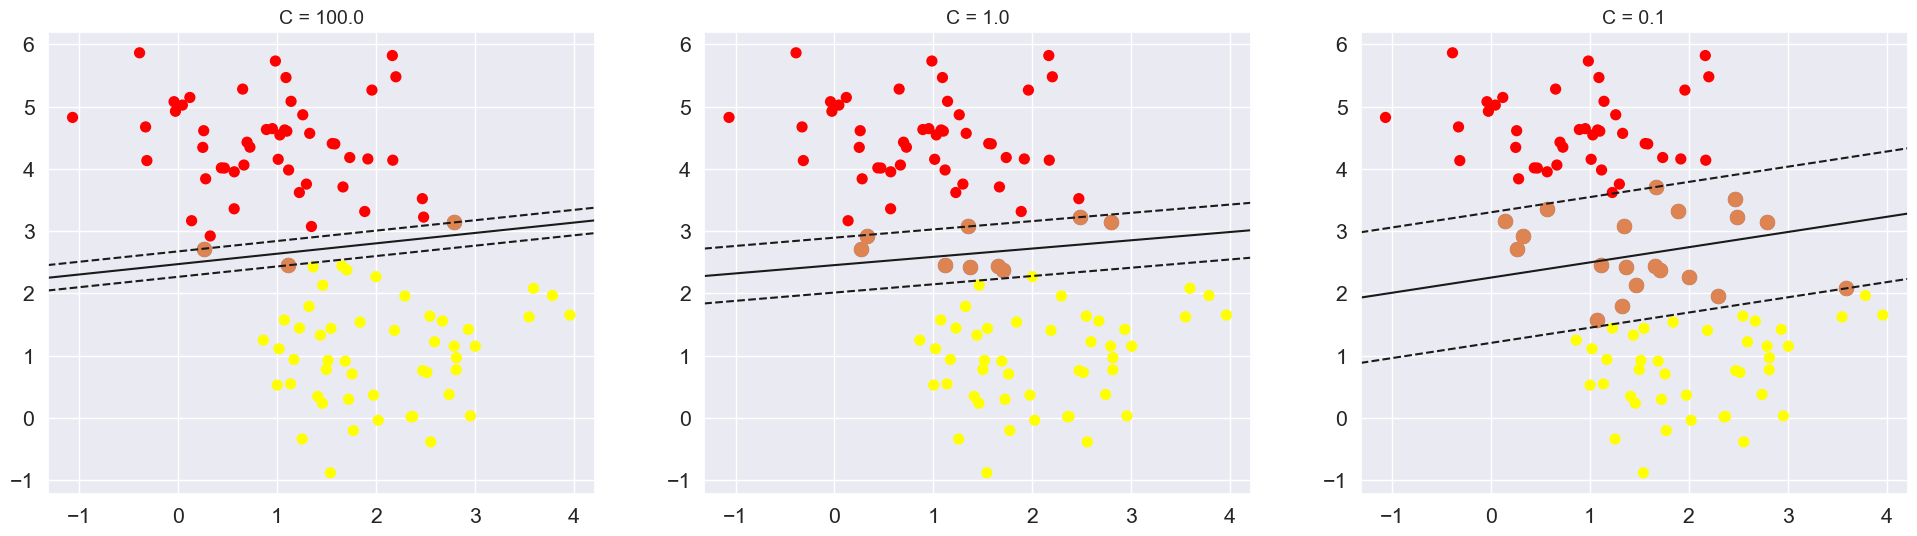

In [37]:
#######################################################

X, y = make_blobs(n_samples=100, centers=2,

                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

for axi, cost in zip(ax, [100, 1, 0.1]):

    model = SVC(kernel='linear', C=cost).fit(X, y)

    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

    plot_svc(model, axi)

    # lw : line width

    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=50, lw=4)

    axi.set_title('C = {0:.1f}'.format(cost), size=14)

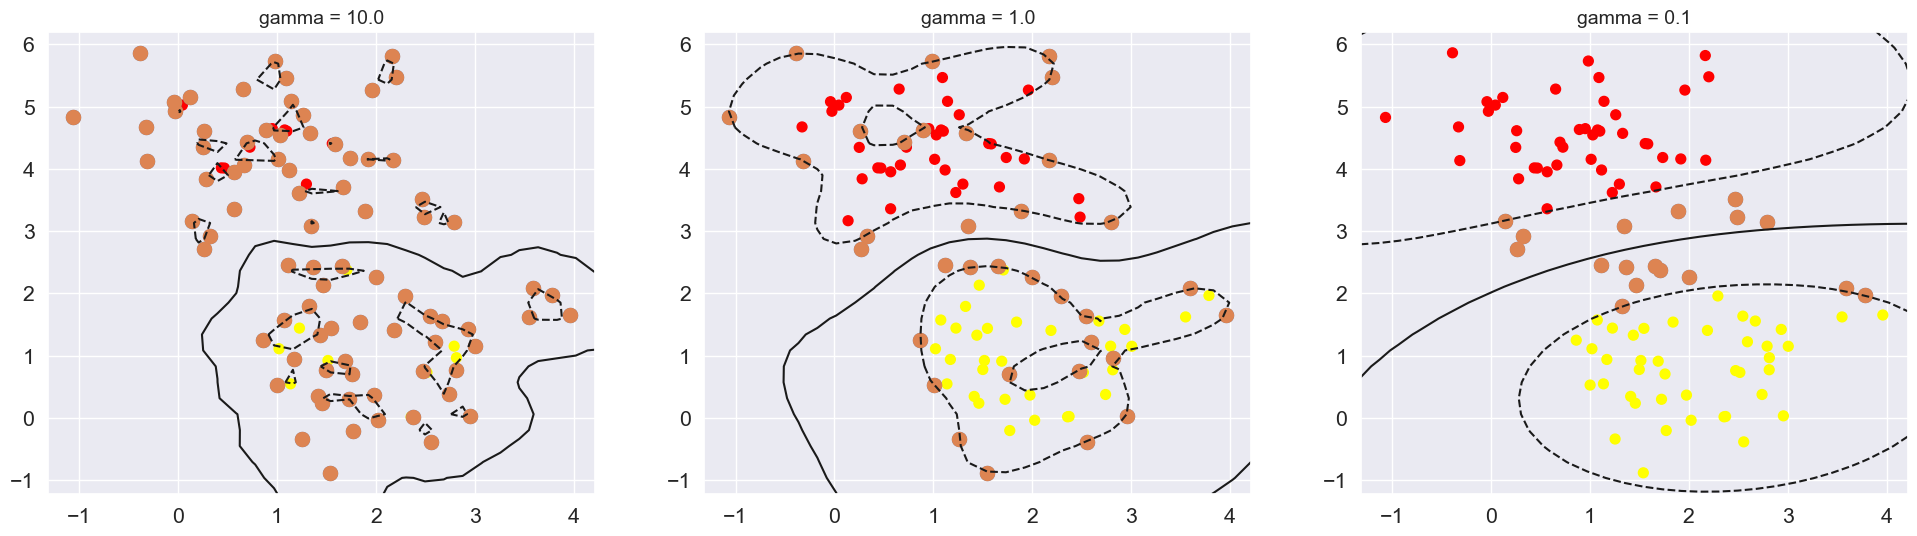

In [38]:
#######################################################

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

#######################################################

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

for axi, g in zip(ax, [10, 1, 0.1]):

    model = SVC(kernel='rbf',gamma=g).fit(X, y)

    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

    plot_svc(model, axi)

    # lw : line width

    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=50, lw=4)

    axi.set_title('gamma = {0:.1f}'.format(g), size=14)